In [1]:
import IPython.display as ipd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import jax.numpy as jnp
from jax import vmap

In [90]:
def plot_wave(func):
    plt.plot(vmap(func)(jnp.linspace(0, 1/128, 512)))
    plt.show()

In [276]:
def plot_audio(func):
    plt.plot(vmap(func)(jnp.linspace(0, 1, 2048)))
    plt.show()

In [91]:
def make_samples(total_measures, bpm, beats_per_measure=4.0, measure_offset=0, samples_per_second=44100):
    
    measure_bounds = jnp.array([measure_offset, measure_offset + total_measures])
    seconds_per_measure = beats_per_measure / (bpm / 60)
    second_bounds = measure_bounds * seconds_per_measure
    total_samps   = total_measures * seconds_per_measure * samples_per_second
    
    samps = jnp.linspace(second_bounds[0], second_bounds[1], int(total_samps), endpoint=False) 
    return samps

In [92]:
def get_measure(t, bpm, beats_per_measure=4.0):
    return jnp.floor((t/(bpm/60))/beats_per_measure)

In [93]:
def note_to_freq(n, base_freq=64):
    return base_freq * 2**(n/12)

In [94]:
def note(n, t):
    f = note_to_freq(n)
    return jnp.sin(2*jnp.pi*t*f)

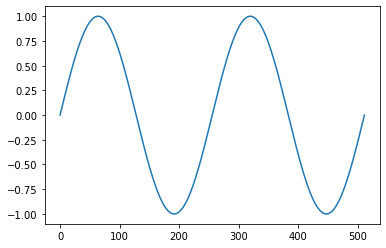

In [95]:
plot_wave(lambda t: note(24, t))

In [96]:
def square_note(n, t):
    f = note_to_freq(n)
    return 2.0*jnp.floor(f*jnp.mod(t, 1/f)+0.5)-1.0

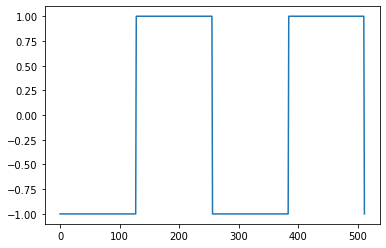

In [102]:
plot_wave(lambda t: square_note(24, t))

In [314]:
def anti_click(t, f=4, width=10):
    return 1-jnp.sin(2*jnp.pi*t*f)**(2*width)

In [339]:
def jam(t):
    #return note(24, t)
    #return square_note(-24, t)
    #return jnp.array([note(12.0*i+0, t)/(i+1)**2 for i in range(8)]).sum()/8*note(-60,t)
    return note(12+jnp.floor(t)*12, t) * anti_click(t)

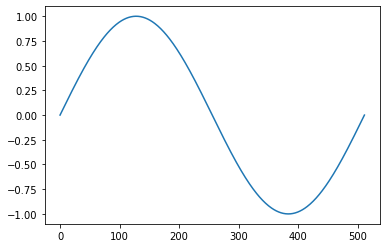

In [340]:
plot_wave(jam)

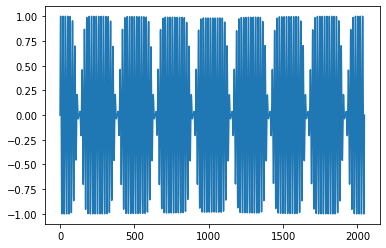

In [341]:
plot_audio(jam)

In [342]:
vjam = vmap(jam)

In [343]:
beats_per_min = 120
total_measures = 8
samps = make_samples(total_measures, beats_per_min)

In [344]:
samps

DeviceArray([0.0000000e+00, 2.2675737e-05, 4.5351473e-05, ...,
             1.5999931e+01, 1.5999954e+01, 1.5999977e+01], dtype=float32)

In [345]:
jam_out = vjam(samps)

In [346]:
ipd.Audio(jam_out, rate=44100)